In [1]:
# 자료 불러오기
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_sas('grip_str.sas7bdat').dropna() 

In [2]:
#연령을 범위로 구분하기
labels = ["{0} - {1}".format(i, i + 10) for i in range(19, 80, 10)]
labels

['19 - 29', '29 - 39', '39 - 49', '49 - 59', '59 - 69', '69 - 79', '79 - 89']

In [3]:
df['age']=df.age.astype('int64')

In [4]:
df['age'] = pd.cut(df.age, range(19, 90, 10), right=False, labels=labels)

In [5]:
df['sex']=df.sex.astype('int64')
df=pd.concat([df,pd.get_dummies(df.sex)],axis=1)

In [6]:
df=df.rename({1:'sex_1',2:'sex_2'},axis='columns')

In [7]:
df=pd.concat([df,pd.get_dummies(df.age)],axis=1)

In [8]:
df=pd.concat([df,pd.get_dummies(df.ho_incm)],axis=1)
df=df.rename({1.0:'ho_incm_1',2.0:'ho_incm_2',3.0:'ho_incm_3',4.0:'ho_incm_4'},axis='columns')

In [9]:
#plt.hist(df.ho_incm)

In [10]:
df=pd.concat([df,pd.get_dummies(df.edu)],axis=1)
df=df.rename({1.0:'edu_1',2.0:'edu_2',3.0:'edu_3',4.0:'edu_4'},axis='columns')

In [11]:
df=pd.concat([df,pd.get_dummies(df.occp)],axis=1)
df=df.rename({1.0:'occp_1',2.0:'occp_2',3.0:'occp_3',4.0:'occp_4',5.0:'occp_5',6.0:'occp_6',7.0:'occp_7'},axis='columns')

In [12]:
df=pd.concat([df,pd.get_dummies(df.marri_1)],axis=1)
df=df.rename({1.0:'marri_1_1',2.0:'marri_1_2'},axis='columns')

In [13]:
df=pd.concat([df,pd.get_dummies(df.sm_presnt)],axis=1)
df=df.rename({0.0:'sm_presnt_0',1.0:'sm_presnt_1'},axis='columns')

In [14]:
df=pd.concat([df,pd.get_dummies(df.dr_high)],axis=1)
df=df.rename({0.0:'dr_high_0',1.0:'dr_high_1'},axis='columns')

In [15]:
df=pd.concat([df,pd.get_dummies(df.pa_aerobic)],axis=1)
df=df.rename({0.0:'pa_aerobic_0',1.0:'pa_aerobic_1'},axis='columns')

In [16]:
df=pd.concat([df,pd.get_dummies(df.pa_walk)],axis=1)
df=df.rename({0.0:'pa_walk_0',1.0:'pa_walk_1'},axis='columns')

In [17]:
df=pd.concat([df,pd.get_dummies(df.pa_muscle)],axis=1)
df=df.rename({0.0:'pa_muscle_0',1.0:'pa_muscle_1'},axis='columns')

In [18]:
df=pd.concat([df,pd.get_dummies(df.HE_HP)],axis=1)
df=df.rename({1.0:'HE_HP_1',2.0:'HE_HP_2',3:'HE_HP_3'},axis='columns')

In [19]:
df=pd.concat([df,pd.get_dummies(df.HE_DM)],axis=1)
df=df.rename({1.0:'HE_DM_1',2.0:'HE_DM_2',3:'HE_DM_3'},axis='columns')

In [20]:
df=pd.concat([df,pd.get_dummies(df.HE_HCHOL)],axis=1)
df=df.rename({0.0:'HE_HCHOL_0',1.0:'HE_HCHOL_1'},axis='columns')

In [21]:
df=pd.concat([df,pd.get_dummies(df.GS_use)],axis=1)
df=df.rename({1.0:'GS_use_1',2.0:'GS_use_2',3.0:'GS_use_3'},axis='columns')

In [22]:
df_drop =df.drop(['sex','age','ho_incm','edu','occp','marri_1','sm_presnt','dr_high','pa_aerobic','pa_walk','pa_muscle','HE_HP','HE_DM','HE_HCHOL','GS_use'],axis=1)

In [23]:
df_drop.shape

(11323, 80)

In [24]:
# csv로 저장하기
#df_drop.to_csv("grip_str_df.csv", mode='w')

In [25]:
# Target 컬럼 생성 - 왼손 악력과 오른손 악력 중 최대값을 타겟으로 한다.
target = df_drop[['max_grip_rt', 'max_grip_lt']].max(axis = 1)
features = df_drop.drop(columns = ['ID', 'max_grip_rt', 'max_grip_lt'], axis = 1)

In [26]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [27]:
import numpy as np
import seaborn as sns

# Correlation test plot 그리기 
#sns.heatmap(df_drop.corr(),annot=True) 
#fig=plt.gcf()
#fig.set_size_inches(10,8)
#plt.show()

### Ridge Regression(능선회귀)
----
    Ridge regression은 계수의 크기에 패널티(penality)를 부과함으로써 최소자승법(Ordinary least squares, 오차의 제곱합을 최소가 되는 해를 구하는)의 문제를 일부 해결한다. 
    오래된 회귀용 선형 알고리즘이다. 
    예측값과 타겟값 사이의 평균제곱오차를 최소화하는 파라메타 찾는다
    매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.
    손실함수는 기존선형회귀의 RSS(잔차 제곱식)와 패널티 두가지 합으로 이루어져 있다. 
    hyperparameter인 alpha를 설정

In [28]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.5)
model.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
##모형의 계수 확인
model.coef_

array([ 5.54116200e-02,  3.84006068e-01, -1.52911597e-01, -3.30916204e-01,
       -7.41190379e-03,  3.71547188e-03, -3.88438788e-04, -3.49100118e-03,
        3.44353871e-06,  2.11792678e-02, -1.45769424e-02, -3.46502861e-02,
        6.25653597e-02, -1.45433970e-01, -8.09065705e-02, -2.15605232e-04,
       -2.77916730e-03,  8.11448594e-03, -1.23344717e-04, -3.35426169e-04,
        7.22501967e-03,  2.35094101e-05,  4.82207598e-05, -1.08125025e-03,
        1.91538796e-04,  1.18057541e-03,  1.11202022e-01,  9.67567762e-02,
       -1.04384180e-04, -9.69385458e-04,  5.54818104e+00, -5.54818104e+00,
        1.03541241e+00,  2.53182293e+00,  1.92247483e+00,  1.14610199e+00,
       -1.78248583e-01, -2.24821553e+00, -4.20934805e+00, -5.35515386e-01,
        2.97279170e-02,  2.75188488e-01,  2.30598981e-01,  1.17389617e-01,
       -1.75327455e-01,  2.37978504e-01, -1.80040667e-01, -4.49331710e-01,
       -5.11953292e-01,  1.82785313e-01,  4.93450121e-01,  1.23101108e+00,
       -1.13133641e-01, -

In [30]:
#예측값에 대한 결정계수( R^2) 반환
pred = model.predict(X_test)

In [31]:
type(pred)

numpy.ndarray

In [32]:
# MSE 계산
import numpy as np
mse = np.mean((pred - y_test)**2)
score = model.score(X_test, y_test)
print("MSE: {:.5f}".format(mse))
print("Score: {:.3f}".format(score))


MSE: 25.96972
Score: 0.747


In [33]:
#파라메타 호출
model.get_params(deep=True)

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [34]:
# 타겟의 로그변환
y_train_log = np.log1p(y_train)
y_train_log.head()

7340     3.157000
14949    3.421000
7574     3.502550
13965    3.288402
7415     3.671225
dtype: float64

In [51]:
%%time
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Ridge

model = Ridge()

#amx_iter은 반복 실행하는 최대 횟수
max_iter = [3000]
alphas = [0.001, 0.1, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2, 5, 10, 20, 30, 40, 50, 100]
## 알파값을 좀더 세밀하게 

param_grid = dict(max_iter=max_iter, alpha = alphas)
##그리드 서치 : 회귀의 평가지표는 R^2이다. 
grid_ridge = GridSearchCV(model, param_grid, scoring='r2', cv=5)

grid_result=grid_ridge.fit(X_train, y_train)

Wall time: 1.98 s


In [52]:
grid_result.best_score_

0.761153309201644

In [53]:
pred = grid_result.predict(X_train)
print(grid_result.best_params_)
pred
print("릿지회귀에 대한 R^2값: {:.2f}".format(grid_result.best_score_))

{'alpha': 5, 'max_iter': 3000}
릿지회귀에 대한 R^2값: 0.76


In [54]:
print("테스트 대한 R^2값: {:.2f}".format(grid_result.score(X_test, y_test)))

테스트 대한 R^2값: 0.75


In [55]:
for k in grid_result.cv_results_.keys():
    print(k)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_alpha
param_max_iter
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score
split0_train_score
split1_train_score
split2_train_score
split3_train_score
split4_train_score
mean_train_score
std_train_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


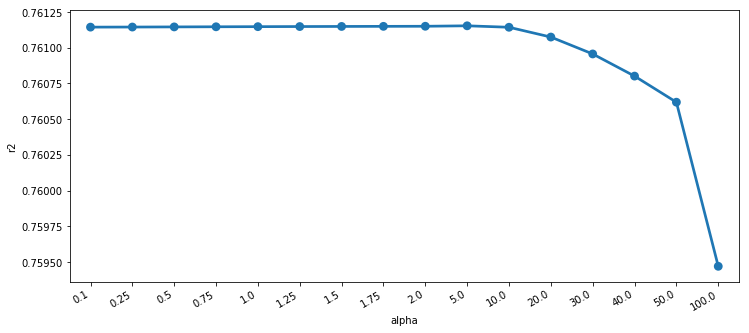

In [56]:
# 학습한 모형을 시각화
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_result.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x['alpha'])
df["r2"] = df["mean_validation_score"].apply(lambda x:x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x="alpha", y="r2", ax=ax)

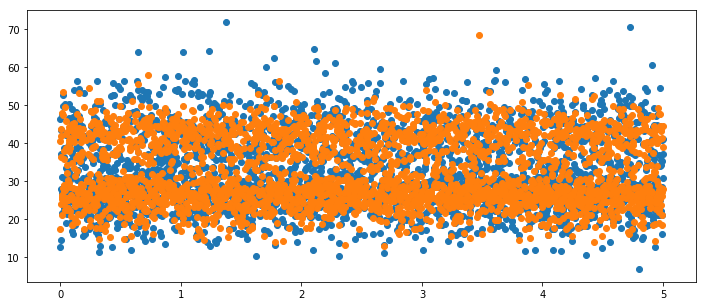

In [57]:
pred = grid_result.predict(X_test)
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
T = np.linspace(0, 5, len(y_test))[:, np.newaxis]
plt.scatter(T, y_test)
plt.scatter(T, pred)

### Lasso regression(Least Absolute Shrinkage and Selection Operator)
---
    선형회귀의 L1 Regularization(규제??)를 적용하는 대안
    Objective = RSS + α * (sum of absolute value of coefficients)
    계수를 0에 가깝게 만들려고 하며 이를 L1 규제라고 한다. 어떤계수는 0이 되기도 하는 이는 완전히 제외하는 변수(피쳐)가 생긴다는 뜻이다. 
    alpha 기본값은 1.0이며, 과소 적합을 줄이기 위해서 이값을  줄여야한다. 

In [42]:
%%time
from sklearn.linear_model import Lasso
lasso_model = Lasso()

#좀더 세분화 하고 싶은나 못하겠음
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10, 20, 30]

param_grid = dict(max_iter=[10000], alpha = alphas)
##그리드 서치 : 회귀의 평가지표는 R^2이다. 
grid_lasso = GridSearchCV(lasso_model, param_grid, scoring='r2', cv=5)

grid_result=grid_lasso.fit(X_train, y_train)

pred = grid_result.predict(X_train)
print(grid_result.best_params_)
pred
print("릿지회귀에 대한 R^2값: {:.2f}".format(grid_result.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

{'alpha': 0.1, 'max_iter': 10000}
릿지회귀에 대한 R^2값: 0.75
Wall time: 3min 2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


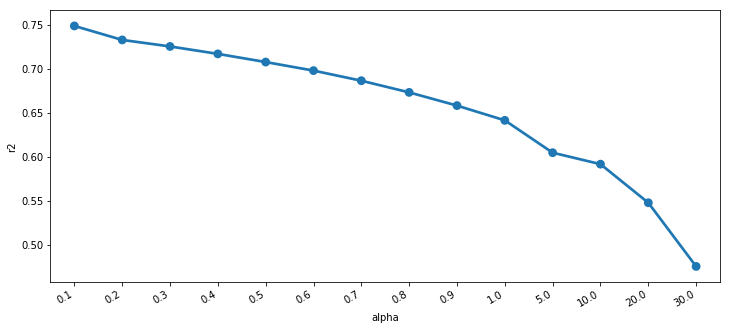

In [43]:
# 학습한 모형을 시각화
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_result.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x['alpha'])
df["r2"] = df["mean_validation_score"].apply(lambda x:x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x="alpha", y="r2", ax=ax)

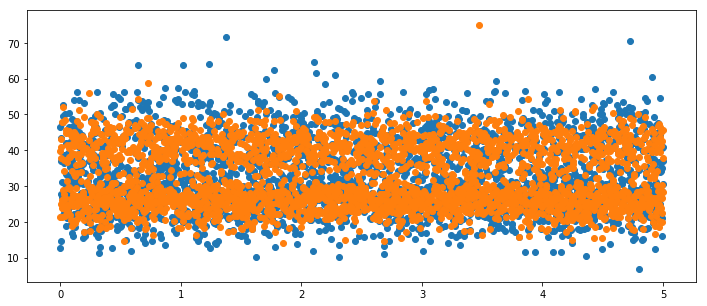

In [50]:
pred = grid_result.predict(X_test)
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
T = np.linspace(0, 5, len(y_test))[:, np.newaxis]
plt.scatter(T, y_test)
plt.scatter(T, pred)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


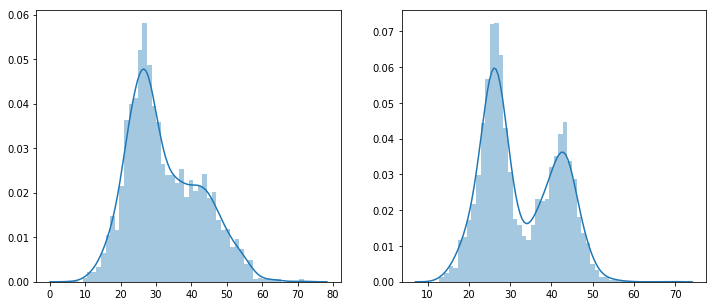

In [61]:
##훈련셋과 비교 하기
pred = grid_result.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_test, ax=ax1, bins=50)
sns.distplot(pred, ax=ax2, bins=50)

In [59]:
# MSE 계산
import numpy as np
mse = np.mean((pred - y_test)**2)
score = grid_result.score(X_test, y_test)
print("MSE: {:.5f}".format(mse))
print("Score: {:.3f}".format(score))

MSE: 25.97195
Score: 0.747


## 앙상블 랜던 포레스트
----
    

In [175]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)

rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_train)
rf_model.score(X_test, y_test)


0.7418667905779828

## 앙상블 그라디언트 부스트
---
    여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
    회귀, 분류로 사용하나 여기서는 회귀만 사용
    랜덤포레스트와 달리 이진 트리의 오차(?)를 보왕하는 방식으로 순차적 트리르 만든다. 
    깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠른게 장점
    learning_rate: 오차를 보정할것인가 제어
    n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련셋의 실수를 바로 잡을 기회가 많지만 너무크면 오버핏된다. 
    max_depath(max_leaf_nodes) 5보다 깊어지지 않게 하기

In [63]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()

n_estimators = [50, 100]

alphas = [0.1, 0.25, 0.5, 0.75, 0.99]

lr = [0.1, 0.5]

param_grid = dict(n_estimators=n_estimators, alpha = alphas, learning_rate=lr)
##그리드 서치 : 회귀의 평가지표는 R^2이다. 
grid_gbr = GridSearchCV(gbr_model, param_grid, scoring='r2', cv=3)

grid_result=grid_gbr.fit(X_train, y_train)

pred = grid_result.predict(X_train)
print(grid_result.best_params_)

print("그라디언트 부스트 회귀에 대한 R^2값: {:.2f}".format(grid_result.best_score_))

{'alpha': 0.5, 'learning_rate': 0.1, 'n_estimators': 100}
그라디언트 부스트 회귀에 대한 R^2값: 0.76
Wall time: 1min 39s


In [64]:
grid_result.score(X_test, y_test)

0.7487030459417152

In [69]:
df.head()

,parameters,mean_validation_score,cv_validation_scores,alpha,r2
0,"{'alpha': 0.1, 'learning_rate': 0.1, 'n_estima...",0.758529,"[0.7596122438834407, 0.76000993674493, 0.75596...",0.10,0.758529
1,"{'alpha': 0.1, 'learning_rate': 0.1, 'n_estima...",0.760790,"[0.7640642489817843, 0.7612366114979021, 0.757...",0.10,0.760790
2,"{'alpha': 0.1, 'learning_rate': 0.5, 'n_estima...",0.739499,"[0.7422539906475616, 0.7401412592368142, 0.736...",0.10,0.739499
3,"{'alpha': 0.1, 'learning_rate': 0.5, 'n_estima...",0.723371,"[0.7288437817276784, 0.7201689062713623, 0.721...",0.10,0.723371
4,"{'alpha': 0.25, 'learning_rate': 0.1, 'n_estim...",0.758534,"[0.7595425644116167, 0.76000993674493, 0.75604...",0.25,0.758534


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


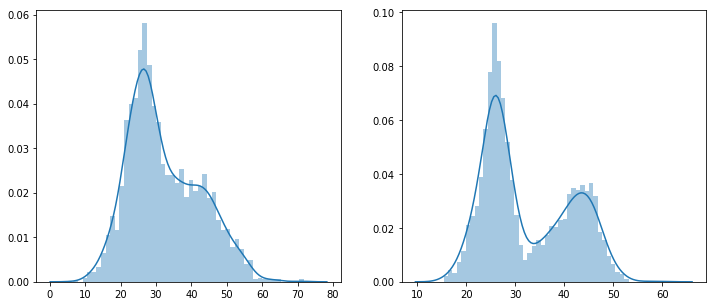

In [70]:
##훈련셋과 비교 하기
pred = grid_result.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_test, ax=ax1, bins=50)
sns.distplot(pred, ax=ax2, bins=50)


### Support Vector Regression
---
    support vector classification 은 훈련셋의 하위셋에만 의존한다. 
    왜나면, 모델을 구축하기 위한 비용함수(cost function)가 예측에 가까운 학습 데이터를 무시하기 때문이다. 
    구분선 중에서 가장 가까운 거리와의 가까운 점과의 거리가 가장 먼것 maximum margin 을 보장하는 그런 직선을 찾는 것 이 바로 SVM 이 하는 일
    * kernel : 알고리즘에 사용할 kernel 을 결정(linear, poly, rbf, sigmoid, precomputed)
    * degree : polynomial 함수의 차수
    * gamma : kernel의 계수
    * tol : 중지 기준에 대한 허용 오차 값
    * C : 오차 구군에 대한 패널티 값
    * epsilon : SVR 모델의 입실론값
    * shrinking : kernel에 사용되는 캐시 값
    * verbose
    * max_iter : 반복 횟수 제한 값

In [ ]:
%%time
from sklearn.svm import SVR

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)
svr_lin = SVR(kernel='linear', C=10)
svr_poly = SVR(kernel='poly', C=10, degree=2)
svr_sigmoid = SVR(kernel='sigmoid', C=10)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)
y_sigmoid = svr_sigmoid.fit(X_train, y_train).predict(X_test)

# Look at the results
lw = 2
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_test, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_test, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.plot(X_test, y_sigmoid, color='b', lw=lw, label='Sigmoid model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### SGDRegressor, (Stochastic Gradient Descent)
---
    class sklearn.linear_model.SGDRegressor(loss=’squared_loss’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate=’invscaling’, eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False, n_iter=None)
    
    Linear model fitted by minimizing a regularized empirical loss with SGD
    SGD는 정구화된 손실을 최소화하는 선형 모형
    
매개 변수

* loss : str, default: ‘squared_loss'
* penalty : str, ‘none’, ‘l2’, ‘l1’, or ‘elasticnet’
* alpha : float, Defaults to 0.0001 Also used to compute learning_rate when set to ‘optimal’.
* l1_ratio : float, The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Defaults to 0.15.
* fit_intercept : bool, Defaults to True.
* max_iter : int, optional, Defaults to 5. Defaults to 1000 from 0.21, or if tol is not None.
* tol : float or None, optional, Defaults to 1e-3 from 0.21.
* shuffle : bool, optional, Defaults to True

In [29]:
%%time

from sklearn.linear_model from SGDRegressor

sgd_model = SGDRegressor()

max_iter =[1000]

alphas = [0.1, 0.25, 0.5, 0.75, 0.99]

param_grid = dict(alpha = alphas, max_iter=max_iter)
##그리드 서치 : 회귀의 평가지표는 R^2이다. 
grid_gbr = GridSearchCV(sgd_model, param_grid, scoring='r2', cv=3)

grid_result=grid_gbr.fit(X_train, y_train)

pred = grid_result.predict(X_train)
print(grid_result.best_params_)

print("SGDRegressor에 대한 R^2값: {:.2f}".format(grid_result.best_score_))

SyntaxError: invalid syntax (<unknown>, line 2)

In [ ]:
# 학습한 모형을 시각화
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_result.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x['alpha'])
df["r2"] = df["mean_validation_score"].apply(lambda x:x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x="alpha", y="r2", ax=ax)

In [ ]:
# MSE 계산
import numpy as np
mse = np.mean((pred - y_test)**2)
score = model.score(X_test, y_test)
print("MSE: {:.5f}".format(mse))
print("Score: {:.3f}".format(score))

## 피쳐 셀랙션  L1-based feature selection
---
    L1 표준을 사용하여 페널티를 적용한 선형 모델 에는 희소 해법이 있습니다. 추정 계수의 대부분은 0입니다. 목표가 다른 분류 자와 함께 사용할 데이터의 차원을 줄이는 것이면, 함께 사용feature_selection.SelectFromModel 하여 0이 아닌 계수를 선택할수 있습니다. 특히, 이러한 목적에 유용한 희소 추정량linear_model.Lasso은 회귀 분석linear_model.LogisticRegression및svm.LinearSVC 분류에유용합니다.

In [78]:
grid_result

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100], 'alpha': [0.1, 0.25, 0.5, 0.75, 0.99], 'learning_rate': [0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [232]:
gbm = GradientBoostingRegressor(alpha=0.9, learning_rate=0.1, n_estimators=100).fit(X_train, y_train)

In [237]:
from sklearn.feature_selection import SelectFromModel


model = SelectFromModel(gbm, prefit=True)
X_train_new = model.transform(X_train)
print(X_train_new.shape)

X_test_new = model.transform(X_test)
print(X_test_new.shape)

(8492, 21)
(2831, 21)


In [236]:
X_test_new.shape

(2831, 21)

In [234]:
X_train.shape

(8492, 79)

In [238]:
X_train_new

array([[156.7,  60.6,  85.8, ...,   0. ,   0. ,   0. ],
       [155.7,  67.6,  92.3, ...,   0. ,   0. ,   0. ],
       [156.9,  48.6,  68.9, ...,   0. ,   1. ,   0. ],
       ...,
       [165.5,  64.9,  76.3, ...,   0. ,   1. ,   0. ],
       [153.3,  45.3,  66.3, ...,   0. ,   1. ,   0. ],
       [169. ,  70.3,  93.2, ...,   0. ,   1. ,   0. ]])

In [239]:
gbm = GradientBoostingRegressor(alpha=0.9, learning_rate=0.1, n_estimators=100).fit(X_train_new, y_train)

In [240]:
pred = gbm.predict(X_train_new)

In [241]:
gbm.score(X_train_new, y_train)

0.7821175171769008

In [242]:
gbm.score(X_test_new, y_test)

0.7338467340087044